**Data set link** [Face Mask](https://www.kaggle.com/ashishjangra27/face-mask-12k-images-dataset)

In [ ]:
!pip install kaggle
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
import os 
import zipfile 
import tensorflow as tf
from tensorflow import keras
from keras import preprocessing
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
print(tf.__version__)

In [ ]:
!kaggle datasets download -d ashishjangra27/face-mask-12k-images-dataset

In [ ]:
local_dir='/content/face-mask-12k-images-dataset.zip'
zip_ref=zipfile.ZipFile(local_dir,'r')
zip_ref.extractall('/tmp')
zip_ref.close

In [3]:
train_dir=os.path.join('/tmp/Face Mask Dataset/Train')
validation_dir=os.path.join('/tmp/Face Mask Dataset/Validation')

In [4]:
model=keras.models.Sequential([
                               keras.layers.Conv2D(32,(3,3),activation='relu',padding='valid',input_shape=(150,150,3)),
                               keras.layers.MaxPool2D(pool_size=(2,2)),
                               keras.layers.Conv2D(64,(3,2),activation='relu',padding='valid'),
                               keras.layers.MaxPool2D(pool_size=(2,2)),
                               keras.layers.Conv2D(128,(3,3),activation='relu',padding='valid'),
                               keras.layers.MaxPool2D(pool_size=(2,2)),
                               keras.layers.Conv2D(256,(3,3),activation='relu',padding='valid'),
                               keras.layers.MaxPool2D(pool_size=(2,2)),
                               keras.layers.Conv2D(512,(3,3),activation='relu',padding='valid'),
                               keras.layers.MaxPool2D(pool_size=(2,2)),
                               
                              
                           
                              tf.keras.layers.Dropout(0.5),
                               
                               
                               keras.layers.Flatten(),
                               keras.layers.Dense(units=512,activation=tf.nn.relu),
                               
                               keras.layers.Dense(units=256,activation=tf.nn.relu),
                               
                               keras.layers.Dense(units=128,activation=tf.nn.relu),
                               
                               keras.layers.Dense(units=64,activation=tf.nn.relu),

                               keras.layers.Dense(units=32,activation=tf.nn.relu),
                               
                               
                               keras.layers.Dense(units=1,activation=tf.nn.sigmoid)
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 73, 64)        12352     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 256)       2

In [5]:
train_data_generator=ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')
validation_data_generator=ImageDataGenerator(
     rescale=1./255
)
train_generator = train_data_generator.flow_from_directory(train_dir,
                                                    batch_size=200,
                                                    class_mode='binary',
                                                    target_size=(150,150)) 
validation_generator =validation_data_generator.flow_from_directory(validation_dir,
                                                         batch_size=80,
                                                         class_mode  = 'binary',
                                                         target_size = (150,150))

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [6]:
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=50,
                              epochs=20,
                              validation_steps=10,
                              verbose=1)

Epoch 1/20
50/50 [==============================] - 58s 1s/step - loss: 0.4841 - accuracy: 0.7643 - val_loss: 0.2565 - val_accuracy: 0.9162
Epoch 2/20
50/50 [==============================] - 58s 1s/step - loss: 0.3100 - accuracy: 0.8781 - val_loss: 0.2603 - val_accuracy: 0.9150
Epoch 3/20
50/50 [==============================] - 58s 1s/step - loss: 0.2774 - accuracy: 0.8929 - val_loss: 0.2220 - val_accuracy: 0.9150
Epoch 4/20
50/50 [==============================] - 58s 1s/step - loss: 0.2618 - accuracy: 0.9015 - val_loss: 0.1629 - val_accuracy: 0.9450
Epoch 5/20
50/50 [==============================] - 58s 1s/step - loss: 0.2434 - accuracy: 0.9077 - val_loss: 0.1422 - val_accuracy: 0.9500
Epoch 6/20
50/50 [==============================] - 58s 1s/step - loss: 0.2327 - accuracy: 0.9109 - val_loss: 0.1568 - val_accuracy: 0.9463
Epoch 7/20
50/50 [==============================] - 58s 1s/step - loss: 0.2174 - accuracy: 0.9163 - val_loss: 0.1064 - val_accuracy: 0.9712
Epoch 8/20
50/50 [==

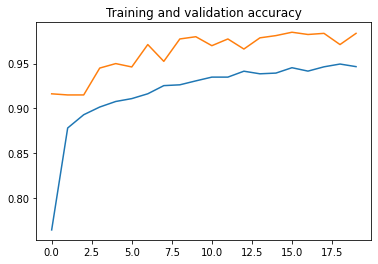

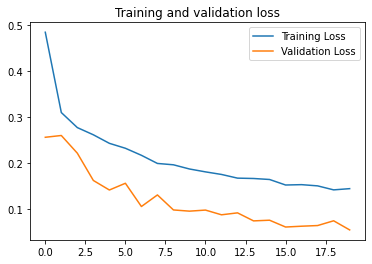

In [7]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc,  label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss,  label='Training Loss')
plt.plot(epochs, val_loss,  label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Saving ema_no_mask.png to ema_no_mask.png
Saving Ema_mask.jpg to Ema_mask.jpg
[1.]
ema_no_mask.png is Without Mask


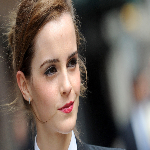

[0.]
Ema_mask.jpg is With Mask


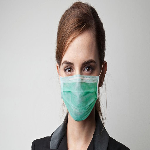

In [8]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
from IPython.display import Image
import cv2
from google.colab.patches import cv2_imshow

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    temp_path='/content/' + fn
    print(fn + " is Without Mask")
    img = cv2.imread(temp_path)
    imS=cv2.resize(img, (150, 150))
    cv2_imshow(imS)
  else:
    temp_path='/content/' + fn
    print(fn + " is With Mask")
    img = cv2.imread(temp_path)
    imS=cv2.resize(img, (150, 150))
    cv2_imshow(imS)


In [10]:
model.save_weights("Facemask.h5")